## Entire Notebook Runtime = 10 minutes

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import sklearn
import yellowbrick
import re
import mglearn
import boto3
from s3ssp import get_file

In [2]:
s3 = boto3.resource('s3')
lyrics = get_file(s3,'s3ssp',download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file='nlp.csv')

In [3]:
df = pd.read_csv(lyrics,sep='|',encoding='utf-8')
df_demo = df.copy().dropna()

In [4]:
df_sample = df_demo.sample(5000)
df_sample_two = df_demo.sample(1000)

In [15]:
#Control Panel - Hyper Parameters

#Count Vectorizer
#max_features = 200 #500
max_df = 10000 #.10
min_df = 4

#LDA
#n_components = 10  #10


#LDA Display
display_n_chunks = 5 #5
n_components = 30     #20
n_words = 10

## Topic Analysis

vect.vocabulary_
vocab = vect.vocabulary_
len(vocab)
vocab

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from yellowbrick.text import TSNEVisualizer

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df_sample_two['lyrics'])

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X)
tsne.show()

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
x_tsne = tsne.fit_transform(X)

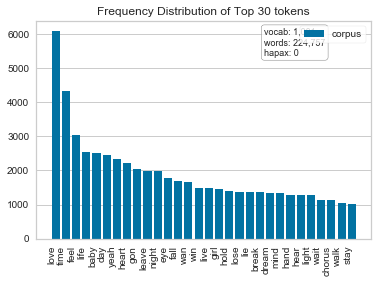

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from yellowbrick.text import FreqDistVisualizer

# Load the text data

vect = CountVectorizer(analyzer='word', token_pattern='[a-zA-Z0-9]{3,}', max_df=max_df, min_df=min_df, stop_words='english')
#vect_tfidf = TfidfVectorizer(analyzer='word', token_pattern='[a-zA-Z0-9]{3,}', max_df=max_df, min_df=min_df, stop_words='english')
docs      = vect.fit_transform(df_sample['lyrics'])
#docs      = vect_tfidf.fit_transform(df_sample['lyrics'])
features   = vect.get_feature_names()
#features   = vect_tfidf.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v',n=30)
visualizer.fit(docs)
visualizer.show()


vect.vocabulary_
vocab = vect.vocabulary_
len(vocab)
vocab

In [29]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=n_components, learning_method="batch",
                                max_iter=35, random_state=0, doc_topic_prior=5, topic_word_prior=40000000000)

vect = CountVectorizer(analyzer='word', token_pattern='[a-zA-Z0-9]{3,}', min_df=min_df, stop_words='english')
#vect_tfidf = TfidfVectorizer(analyzer='word', token_pattern='[a-zA-Z0-9]{3,}', min_df=min_df, stop_words='english')
docs = vect.fit_transform(df_sample['lyrics'])
#docs = vect_tfidf.fit_transform(df_sample['lyrics'])
features= vect.get_feature_names()
#features= vect_tfidf.get_feature_names()

# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once

document_topics = lda.fit_transform(docs)

#print("lda.components_.shape: {}".format(lda.components_.shape))

# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)#[:, ::-1]


# Get the feature names from the vectorizer
feature_names = np.array(features)

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(n_components), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=display_n_chunks, n_words=n_words)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
treatment     japan         ideology      paste         jamaica       
thermostat    minimum       construction  sneaker       battery       
pope          wid           spice         fuzz          wid           
vietnam       envelope      spinner       smashin       sneaker       
draggin       cus           mozart        racist        sweater       
sicken        strugglin     hitter        vary          mast          
oprah         promote       tilt          remnant       cringe        
critter       unearthly     lexus         vapor         fraction      
crop          welfare       quiver        conception    rapping       
steadily      harass        nappy         jacker        teddy         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
prod

In [ ]:
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
dio           shopper       dong          eater         murphy        
nappy         minimum       tearin        picket        lever         
draggin       deceased      supermarket   conception    produce       
vietnam       caso          gruesome      stew          wilson        
convinced     incense       grape         vapor         hiding        
leash         miserable     stackin       central       ledge         
gestern       retard        draft         pulsate       depravity     
fantastic     carefree      poke          gunfire       savor         
simplicity    sul           sophisticated thermostat    heridas       
construction  impact        japan         payback       moses         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
venture       gainst        convinced     ganar         confiscate    
invest        principio     gritty        gainst        clot          
richard       blindly       dune          clandestine   fuzz          
amarte        interrupt     miserable     gana          whale         
oliver        fortify       fertile       nude          pope          
tilt          worldly       venturini     circulate     merciful      
masturbate    interview     intentional   cinderella    indulgence    
emperor       sprinkle      resign        indulgence    beau          
extinction    prevent       solos         cia           stalker       
treatment     grail         initial       unwanted      madly         


topic 10      topic 11      topic 12      topic 13      topic 14      
--------      --------      --------      --------      --------      
pluck         fuzz          slayer        nude          crucified     
annihilation  whisker       paste         miserable     madly         
resume        hamburger     pastor        imposible     principle     
educate       lexus         glee          venture       unity         
medication    gymnastic     dixie         sophisticated magia         
treatment     crab          righteousness gainst        closing       
intentional   barbed        crisis        calling       malicious     
eater         wid           venturini     moses         clandestine   
testimony     crease        minimum       resolve       unfurl        
shopper       guardo        savor         mound         circulate     


topic 15      topic 16      topic 17      topic 18      topic 19      
--------      --------      --------      --------      --------      
rearview      rearview      oppression    elder         larga         
shocking      doe           schw          fairytale     grail         
shitty        dong          schl          guardo        slayer        
oliver        midday        cocoon        clot          brainwash     
blatant       seekin        flourish      responsible   grammar       
sheer         thriller      ilusin        shampoo       persevere     
shattered     arouse        mothafucka    gruesome      shrapnel      
ilusin        mentiras      mourning      madly         phat          
cone          dulce         illness       malicious     vista         
nope          dune          blocks        circulate     boost         


In [ ]:
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
ramble        savor         togetherness  savor         hitter        
togetherness  hangman       deceased      pilot         beamer        
deceased      exception     hectic        japan         stackin       
hmmm          medication    exciting      hangman       leash         
peculiar      lynch         infest        ramble        rearview      
hectic        hitter        peculiar      vacate        boston        
exciting      doe           unzip         hmmm          bentley       
infest        cobra         ramble        staring       escalate      
leash         mothafucka    gambler       invest        amber         
gambler       southside     leash         southside     unzip         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
inhuman       savor         ramble        escalate      escalate      
exception     hangman       togetherness  doe           solos         
bentley       medication    deceased      stackin       japan         
spinner       pilot         pilot         hitter        cloak         
lexus         hitter        hectic        cobra         fret          
lavish        southside     hassle        rearview      haunted       
ghostly       cuatro        peculiar      bentley       exception     
visible       stackin       elder         exception     reverend      
crab          lynch         gambler       miserable     snuff         
construction  grammar       infest        komm          hahahaha      


topic 10      topic 11      topic 12      topic 13      topic 14      
--------      --------      --------      --------      --------      
togetherness  escalate      japan         cobra         hitter        
ramble        hitter        pilot         stackin       stackin       
deceased      stackin       savor         miserable     cobra         
hectic        rearview      escalate      japan         rearview      
peculiar      doe           tilt          savor         cloak         
exciting      cobra         solos         hitter        juvenile      
hassle        beamer        ramble        recite        mothafucka    
infest        exception     undeniable    visible       crucial       
elder         bentley       hahahaha      revival       critter       
gambler       komm          vacate        solos         recite        


topic 15      topic 16      topic 17      topic 18      topic 19      
--------      --------      --------      --------      --------      
togetherness  savor         savor         savor         togetherness  
deceased      hangman       hangman       pilot         deceased      
ramble        pilot         stool         hangman       hectic        
hectic        medication    pilot         japan         leash         
exciting      japan         linen         medication    ramble        
peculiar      minimum       medication    southside     exciting      
infest        southside     epic          doe           unzip         
gambler       invest        southside     invest        fertile       
elder         cuatro        lynch         bacardi       infest        
fertile       unfair        cuatro        escalate      peculiar      


topic 20      topic 21      topic 22      topic 23      topic 24      
--------      --------      --------      --------      --------      
togetherness  hitter        leash         togetherness  togetherness  
deceased      stackin       togetherness  ramble        deceased      
hectic        rearview      deceased      deceased      ramble        
infest        beamer        unzip         hectic        hectic        
exciting      savor         exciting      infest        exciting      
fertile       medication    hmmm          peculiar      leash         
peculiar      hangman       hectic        hassle        infest        
gambler       cobra         ramble        elder         peculiar      
elder         bentley       infest        exciting      fertile       
hassle        stool         gambler       fertile       unzip         


topic 25      topic 26      topic 27      topic 28      topic 29      
--------      --------      --------      --------      --------      
togetherness  revival       hitter        stackin       savor         
deceased      cobra         stackin       hitter        pilot         
hectic        swamp         cobra         cobra         hangman       
exciting      cloak         hobo          rearview      medication    
fertile       miserable     critter       juvenile      cuatro        
infest        escalate      juvenile      recite        southside     
unzip         ideology      cloak         cringe        tilt          
peculiar      critter       rearview      cloak         springtime    
leash         visible       draggin       hobo          vacate        
gambler       draggin       exception     crucial       bacardi   

In [ ]:
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
draggin       banish        stackin       political     rearview      
bloated       slab          rearview      hobo          draggin       
spew          colossal      hitter        colossal      hitter        
hobo          incense       beamer        ledge         beamer        
inbreed       miserable     construction  resume        whale         
vacate        revel         gruesome      conquest      teddy         
unity         accomplishmentinfest        pulsate       fantastic     
cunning       cinderella    ideology      blindly       mozart        
whale         unearthly     smear         unaffected    deceased      
venture       hahahaha      cuento        mound         submarine     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
teddy         moses         teddy         gritty        rearview      
draggin       incense       draggin       vietnam       hitter        
infest        hobo          mozart        hobo          beamer        
mozart        shrine        cunning       bloated       stackin       
venture       clot          infest        grassy        subway        
shitty        quiver        gorge         cone          schl          
punishment    headphone     bloated       vacate        crab          
magician      promote       spew          troll         indulgence    
banish        welfare       cone          unwanted      infest        
bate          hahahaha      dune          underworld    punishment    


topic 10      topic 11      topic 12      topic 13      topic 14      
--------      --------      --------      --------      --------      
unas          mozart        beamer        stackin       shitty        
armour        teddy         hitter        hitter        vessel        
rapping       draggin       rearview      hobo          hills         
indulgence    stackin       stackin       beamer        sill          
aun           rearview      ledge         homework      nat           
rapid         hitter        pastor        rapping       venture       
clung         beamer        persevere     superior      pageant       
testimony     hobo          stalker       conquest      heridas       
cuento        viendo        vietnam       smear         wayward       
forecast      clung         hamburger     staring       simplicity    


topic 15      topic 16      topic 17      topic 18      topic 19      
--------      --------      --------      --------      --------      
stackin       rearview      punishment    unaffected    rearview      
rearview      beamer        infest        infest        beamer        
hitter        hitter        aun           nat           stackin       
beamer        stackin       picket        punishment    hitter        
unearthly     vietnam       banish        smear         teddy         
banish        intact        juvenile      pastor        clot          
venture       heridas       promote       gruesome      resign        
resign        unaffected    mentiras      rapping       construction  
rapping       rola          fantastic     resume        shrine        
gig           gehst         stunden       prada         unearthly     


topic 20      topic 21      topic 22      topic 23      topic 24      
--------      --------      --------      --------      --------      
draggin       jemand        vietnam       punishment    shitty        
mozart        impression    shrine        construction  hills         
venture       erz           ledge         putrid        critter       
boston        guardo        mentiras      inhuman       revival       
staring       construction  retard        superior      extinction    
teddy         armour        clot          unas          pulsate       
revival       heap          bloated       forecast      grotesque     
conception    superior      mound         clot          retard        
disdain       thermostat    revel         quiver        eater         
dissipate     enlightenment hills         persevere     conquest      


topic 25      topic 26      topic 27      topic 28      topic 29      
--------      --------      --------      --------      --------      
rearview      banish        submarine     eater         rearview      
beamer        moses         extinction    draggin       enlightenment 
hitter        viendo        desolation    stackin       embed         
pageant       lluvia        simplicity    medication    grotesque     
rola          alarming      cosmos        sill          method        
punishment    shocking      stackin       bate          grassy        
conquest      unearthly     embed         gorge         political     
keeping       slab          enlightenment visible       cia           
stackin       ripe          multiple      alleyway      pulsate       
extinction    troll         teddy         guardo        infest        


In [ ]:
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
crop          rotate        rearview      soprano       beamer        
paste         promote       stackin       paste         rearview      
barstool      minimum       hitter        cia           sweater       
treatment     coconut       beamer        amarte        soprano       
pastor        unearthly     monica        shampoo       teddy         
draggin       strugglin     female        eater         trae          
fraction      feedin        suficiente    hectic        hitter        
thermostat    japan         shampoo       barstool      battery       
pope          barbed        feedin        coconut       draggin       
mozart        intelligence  sophisticated resume        jamaica       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
draggin       recite        neglect       ghoul         havoc         
teddy         bitty         draggin       bitty         rearview      
mozart        finance       grammar       pastor        beamer        
homework      feedin        gimmick       soprano       hitter        
unfair        promote       mozart        doe           crab          
ironic        havoc         teddy         gorge         crisis        
rotate        mint          hamburger     rotate        stackin       
barstool      reverend      persevere     riot          hectic        
thermostat    headphone     fussin        calling       indulgence    
grotesque     quiver        messy         amarte        niece         


topic 10      topic 11      topic 12      topic 13      topic 14      
--------      --------      --------      --------      --------      
treatment     draggin       hamburger     bitty         monica        
location      mozart        beamer        hitter        promote       
crucial       teddy         persevere     beamer        stompin       
principle     rearview      neglect       stackin       finance       
dune          stackin       grammar       female        vandal        
hangman       neglect       finance       principle     splatter      
unas          beamer        rearview      escalate      hamburger     
doe           strugglin     promote       recite        hills         
barstool      grammar       hitter        windshield    miserable     
stew          hitter        stackin       bruce         revival       


topic 15      topic 16      topic 17      topic 18      topic 19      
--------      --------      --------      --------      --------      
beamer        rearview      rockstar      grammar       beamer        
hitter        beamer        treatment     neglect       rearview      
rearview      doe           crucial       resume        neglect       
stackin       hitter        promote       persevere     equality      
rapping       neglect       bentley       accomplishmentstackin       
gimmick       principle     minimum       rapping       persevere     
location      rapping       cobra         limitation    hitter        
resume        tearin        trump         relapse       grammar       
eater         hamburger     outfit        monica        gash          
cobra         resume        phat          hamburger     clung         


topic 20      topic 21      topic 22      topic 23      topic 24      
--------      --------      --------      --------      --------      
female        gimmick       treatment     rotate        hamburger     
teddy         coconut       crucial       smashin       remnant       
hahahaha      finance       acknowledge   epic          grammar       
mozart        paste         dong          register      villain       
draggin       treatment     promote       prada         cringe        
feedin        sophisticated japan         persevere     female        
equality      construction  splatter      location      neglect       
hangman       acknowledge   bacardi       amarte        strugglin     
illness       feedin        principle     jamaica       solos         
sophisticated superior      crisis        clung         splatter      


topic 25      topic 26      topic 27      topic 28      topic 29      
--------      --------      --------      --------      --------      
doe           thermostat    monica        escalate      promote       
hitter        unfair        fraction      rotate        finance       
crisis        kong          fussin        gorge         accomplishment
feedin        gamble        homework      recite        beamer        
beamer        pastor        cussin        bitty         relapse       
rearview      location      bong          trump         limitation    
stew          principle     escalate      villain       recite        
levi          cobra         guardo        masturbate    bacardi       
plaster       harass        sicken        pastor        doe           
feeble        escalate      bentley       flourish      resume     

In [ ]:
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
treatment     japan         recite        cia           battery       
vietnam       envelope      hitter        soprano       sneaker       
pope          cus           bentley       paste         mast          
swamp         strugglin     ideology      resume        jamaica       
smear         rotate        stackin       linen         siphon        
fraction      unearthly     clung         fuzz          paste         
hobo          banish        shampoo       ghostly       ceilin        
steadily      wid           headphone     fraction      wid           
thermostat    minimum       draft         subway        fraction      
draggin       promote       lexus         shampoo       jacker        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
teddy         recite        fussin        moses         crisis        
juvenile      headphone     wid           ripe          crab          
crease        battery       cussin        madly         resume        
draggin       jacker        risky         nappy         havoc         
produce       reverend      grammar       vacate        indulgence    
infest        listener      convinced     riot          draft         
homework      troll         glamor        ally          equality      
emperor       quiver        madly         vapor         rola          
mozart        vacate        negativity    lavish        hitter        
plaster       dune          gimmick       ebony         subway        


topic 10      topic 11      topic 12      topic 13      topic 14      
--------      --------      --------      --------      --------      
steadily      vary          hamburger     stackin       stompin       
southside     stackin       persevere     renegade      olvidarte     
smashin       draggin       vapor         recite        hills         
treatment     teddy         neglect       exception     aun           
renegade      mozart        smashin       hitter        monica        
unas          rola          leash         battery       trae          
tilt          lexus         imposible     draft         leash         
location      gallery       beamer        bitty         dong          
recite        barbed        escalate      frontline     imposible     
register      pope          madly         moses         fuzz          


topic 15      topic 16      topic 17      topic 18      topic 19      
--------      --------      --------      --------      --------      
steadily      tearin        cobra         resume        beamer        
cobra         doe           bentley       nappy         clot          
ideology      rearview      juvenile      trae          intact        
dong          juvenile      boston        siphon        interview     
vary          resume        gimmick       grammar       clung         
japan         rola          trump         leash         rearview      
ripe          limitation    subway        fraction      solos         
rapping       magician      fuzz          paste         fuzz          
outfit        vietnam       register      critter       stackin       
slayer        neglect       outfit        limitation    hmmm          


topic 20      topic 21      topic 22      topic 23      topic 24      
--------      --------      --------      --------      --------      
headphone     resume        dong          draft         crease        
jacker        treatment     lynch         rotate        solos         
tearin        gimmick       japan         renegade      critter       
embed         lavish        ledge         register      crisis        
niece         shrapnel      spineless     epic          wut           
illness       steadily      nope          strugglin     grammar       
boston        sweater       trump         interview     remnant       
draggin       southside     retard        smashin       retard        
stew          smashin       ancestor      murphy        fixation      
feedin        dune          egypt         prada         cringe        


topic 25      topic 26      topic 27      topic 28      topic 29      
--------      --------      --------      --------      --------      
crisis        cobra         crease        gorge         fuzz          
doe           jamaica       cussin        smashin       bacardi       
smashin       springtime    stackin       lynch         savor         
beamer        lavish        monica        escalate      fixation      
plaster       harass        fussin        snuff         contempt      
stew          messy         jerry         japan         solos         
southside     blocks        ideology      stackin       cuento        
juvenile      epic          bentley       mothafucka    sling         
cobra         solos         smear         dong          shrapnel      
slayer        emperor       sling         pope          grotesque 

In [ ]:
lda_output = lda.transform(docs)

print(lda)

# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(docs))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(docs))

# See model parameters
print(lda.get_params())

In [ ]:
# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_sample))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.style.applymap(color_green).applymap(make_bold)

df_document_topics

In [ ]:
lda = LatentDirichletAllocation(n_components=n_components, learning_method="batch",
                                max_iter=35, random_state=0, doc_topic_prior=5000, topic_word_prior=1000)

vect = CountVectorizer(analyzer='word', token_pattern='[a-zA-Z0-9]{3,}', min_df=min_df, stop_words='english')

# Show top n keywords for each topic
def show_topics(vectorizer=vect, lda_model=lda, n_words=n_words):
    keywords = np.array(vect.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vect, lda_model=lda, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from yellowbrick.text import TSNEVisualizer

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(feature_names)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X)
tsne.show()

#Count Vectorizer
#max_features = 200 #500
max_df = 15 #.10
min_df = 3



#LDA
#n_components = 10  #10


#LDA Display
display_n_chunks = 5 #5
n_components = 20      #20
n_words = 10
lda.components_.shape: (20, 6218)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
sooner        sooner        faithful      faithful      sooner        
faithful      faithful      sooner        sooner        faithful      
insecurity    insecurity    insecurity    insecurity    insecurity    
collide       collide       collide       collide       collide       
rejoice       rejoice       rejoice       rejoice       rejoice       
honesty       honesty       honesty       honesty       gutter        
gutter        gutter        gutter        gutter        farewell      
farewell      farewell      farewell      farewell      penny         
idiot         soar          idiot         soar          hoo           
penny         penny         soar          idiot         graveyard     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
sooner        faithful      sooner        honesty       sooner        
faithful      sooner        faithful      farewell      faithful      
insecurity    insecurity    insecurity    idiot         insecurity    
collide       collide       collide       soar          collide       
rejoice       rejoice       rejoice       surprised     rejoice       
honesty       honesty       honesty       penny         honesty       
gutter        gutter        gutter        hoo           gutter        
idiot         soar          idiot         reap          farewell      
farewell      surprised     farewell      remedy        idiot         
soar          idiot         surprised     graveyard     soar          


topic 10      topic 11      topic 12      topic 13      topic 14      
--------      --------      --------      --------      --------      
sooner        sooner        sooner        sooner        sooner        
faithful      insecurity    faithful      faithful      faithful      
insecurity    faithful      insecurity    insecurity    insecurity    
collide       collide       collide       collide       collide       
rejoice       rejoice       rejoice       rejoice       rejoice       
honesty       honesty       honesty       honesty       honesty       
gutter        gutter        gutter        gutter        gutter        
farewell      idiot         farewell      farewell      farewell      
soar          penny         idiot         idiot         idiot         
idiot         farewell      soar          surprised     soar          


topic 15      topic 16      topic 17      topic 18      topic 19      
--------      --------      --------      --------      --------      
sooner        sooner        sooner        faithful      sooner        
faithful      faithful      faithful      sooner        faithful      
insecurity    insecurity    insecurity    insecurity    insecurity    
collide       collide       collide       collide       collide       
rejoice       rejoice       rejoice       rejoice       rejoice       
honesty       honesty       honesty       honesty       honesty       
gutter        gutter        gutter        gutter        gutter        
farewell      farewell      farewell      farewell      idiot         
idiot         soar          soar          idiot         surprised     
soar          idiot         idiot         soar          farewell

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range=(1,1))
vect_weights = vect.fit_transform(df_sample['lyrics'])
weights = np.asarray(vect_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(50)

In [ ]:
print(lda.components_)

In [ ]:
print(vect.vocabulary_)

## Assemble Playlist

In [ ]:
def get_playlist_elements(components=range(n_components), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=display_n_chunks, n_words=n_words):
    topics_words = []
    
    for i in range(0, len(components), topics_per_chunk):
        # for each chunk:
        these_topics = components[i: i + topics_per_chunk]
        
        for t in these_topics:
            
            topic_words = []
            
            for i in range(n_words):
                
                try:
                    #print(("{:<14}" * len_this_chunk).format(
                    #    *feature_names[sorting[these_topics, i]]))
                    topics_words.append({'topic':f'topic{t}','word':feature_names[sorting[these_topics, i]][t]})
                except:
                    pass
        
    return topics_words

In [ ]:
playlist_elements = get_playlist_elements()

In [ ]:
df_playlist_elements = pd.DataFrame(playlist_elements)

In [ ]:
list_df_words = df_playlist_elements['word'].tolist()
list_df_topics = set(df_playlist_elements['topic'].tolist())

In [ ]:
def find_lyrics(lyrics,element,track_uri):
    
    if(lyrics.find(element)!= -1):
        
        return track_uri
    
    else:
        
        return None


In [ ]:
def make_ssp(topics,words):
    topics_words = df_playlist_elements.copy()
    
    df_lyrics = df_demo.copy()
    
    df_empty = pd.DataFrame()
    
    ssp = []
    
    #Set df_demo_ssp to topic number

    topics_words = topics_words[(topics_words['topic']== f'topic{topic}')]
    
    df_demo_ssp_wordset = topics_words['word'].tolist()

    for word in df_demo_ssp_wordset:
        
        df_empty[f'{word}'] = df_lyrics.apply(lambda x: find_lyrics(x['lyrics'],word,x['track_uri']),axis=1)



    return df_empty


## Takes 8 minutes

In [ ]:
list_ssp = []

for topic in range(len(list_df_topics)):
    
    ssp = make_ssp(topic,list_df_words)

    
    df_ssp = ssp.dropna(how='all')
    
    for x in range(100):
        
        for col in df_ssp.columns:
            
            df_ssp_col = df_ssp[col].dropna(how='any')
            
            col_track_uri = df_ssp_col.sample(1).values
            
            list_ssp.append({'playlist':f'topic{topic}playlist{x}','track_uri':col_track_uri[0]})


In [ ]:
sample_ssp = pd.DataFrame(list_ssp)
df_track_ssp = sample_ssp.merge(df_demo,left_on='track_uri',right_on='track_uri')
df_agg_ssp = sample_ssp.merge(df_demo,left_on='track_uri',right_on='track_uri').groupby('playlist').median()

In [ ]:
ssp = df_track_ssp[df_track_ssp['playlist']=='topic0playlist1'].sort_values(by='valence',ascending=True)

In [ ]:
ssp.plot.line(x='valence',y='energy')

## Save SSP

In [ ]:
#df_sample_ssp.to_csv('test_ssp.csv',sep='|',index=True)

## Below is Under Development

In [ ]:
## Visualization (Valence Curve, Energy Curve)

In [ ]:
## Create Spotify Playlist

In [ ]:
import requests
import json
import pandas as pd
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication

In [ ]:
cid = '049ade7215e54c63a2b628f3784dc407'
secret = '5d30770120ad4dbbabbb5ce538110e05'
redirect_uri = 'http://google.com/'
username = 'name'

In [ ]:
#Authentication

scope = 'playlist-modify-private'
token_playlist = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_playlist:
    
    sp_playlist = spotipy.Spotify(auth=token_playlist)

else:
    
    print("Can't get token for", username)
    
#Authentication

scope = 'user-read-private'

token_user = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_user:
    sp_user = spotipy.Spotify(auth=token_user)
else:
    print("Can't get token for", username)

In [ ]:
def get_user_id(url):
    try:
        resp = requests.get(url,headers={'Authorization': 'Bearer ' + token_user},
                             #data={"name": "SSP"}
                           )
        
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as err:
        
        print(err)
        
    
    response = resp.json()
    userid = response['id']
    
    return userid


In [ ]:
user_id = get_user_id('https://api.spotify.com/v1/me')

In [ ]:
identification = user_id
identification

In [ ]:
playlist = sp_playlist.user_playlist_create(identification,'SSP_Ideal', public=False, description="Ideal SSP")

In [ ]:
playlist

In [ ]:
playlist_tracks = sp_playlist.user_playlist_add_tracks(identification,playlist['id'],ssp['track_uri'], position=None)

## End

## Sample Topic Analysis Code

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {i}:".format(i=topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#How many words per topic
no_top_words = 4
display_topics(nmf, tfidf_feature_names, no_top_words)